<a href="https://colab.research.google.com/github/Anisha-Tasneem/Phishing-Email-Detection/blob/main/Gradient%20Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess & Model Train

In [17]:
import pandas as pd
import psutil
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Function to get current CPU and RAM usage
def get_resource_usage():
    cpu_usage = psutil.cpu_percent()
    ram_usage = psutil.virtual_memory().used / (1024 ** 3)  # Convert bytes to GB
    return cpu_usage, ram_usage

# Record resource usage before data loading
cpu_before, ram_before = get_resource_usage()

# Start timer for data loading
start_time_data_loading = time.time()

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/CSE445/Phishing_Email.csv')

# End timer for data loading
end_time_data_loading = time.time()

# Display the first few rows of the dataset
print(data.head())

# Start timer for preprocessing
start_time_preprocessing = time.time()

# Preprocess the email text
def preprocess_text(text):
    # Convert to string if not already
    text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Handle missing values by filling with an empty string
data['Email Text'] = data['Email Text'].fillna('')

# Apply the preprocessing function to the 'Email Text' column
data['Email Text'] = data['Email Text'].apply(preprocess_text)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['Email Text'])

# Encode the labels
y = data['Email Type'].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# End timer for preprocessing
end_time_preprocessing = time.time()

# Record resource usage before training
cpu_before_training, ram_before_training = get_resource_usage()

# Start timer for training
start_time_training = time.time()

# Train the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# End timer for training
end_time_training = time.time()

# Record resource usage after training
cpu_after_training, ram_after_training = get_resource_usage()

# Start timer for evaluation
start_time_evaluation = time.time()

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# End timer for evaluation
end_time_evaluation = time.time()

# Record resource usage after evaluation
cpu_after_evaluation, ram_after_evaluation = get_resource_usage()

# Print resource usage and other metrics
print(f'CPU usage before training: {cpu_before}%')
print(f'RAM usage before training: {ram_before:.2f} GB')
print(f'CPU usage after training: {cpu_after_training}%')
print(f'RAM usage after training: {ram_after_training:.2f} GB')
print(f'CPU usage after evaluation: {cpu_after_evaluation}%')
print(f'RAM usage after evaluation: {ram_after_evaluation:.2f} GB')
print(f'Total data loading time: {end_time_data_loading - start_time_data_loading:.2f} seconds')
print(f'Total preprocessing time: {end_time_preprocessing - start_time_data_loading:.2f} seconds')
print(f'Total training time: {end_time_training - start_time_training:.2f} seconds')
print(f'Total evaluation time: {end_time_evaluation - start_time_evaluation:.2f} seconds')
print(f'Overall runtime: {end_time_evaluation - start_time_data_loading:.2f} seconds')
print(f'Accuracy: {accuracy * 100:.2f}%')

   Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email  
CPU usage before training: 21.3%
RAM usage before training: 2.16 GB
CPU usage after training: 69.8%
RAM usage after training: 2.28 GB
CPU usage after evaluation: 50.0%
RAM usage after evaluation: 2.28 GB
Total data loading time: 0.81 seconds
Total preprocessing time: 16.00 seconds
Total training time: 43.04 seconds
Total evaluation time: 0.02 seconds
Overall runtime: 59.06 seconds
Accuracy: 90.94%


# Hyper-parameter space exploration

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.7, 0.3),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,  # Number of folds in cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Get the best hyperparameters and best cross-validation accuracy
best_params = random_search.best_params_
best_cv_accuracy = random_search.best_score_

# Evaluate the tuned model on the test data
test_accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and accuracies
print(f'Best Hyperparameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_cv_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'learning_rate': 0.06612771975694963, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 10, 'n_estimators': 306, 'subsample': 0.8282623055075649}
Best Cross-Validation Accuracy: 96.21%
Test Accuracy: 90.94%


# Learning curve

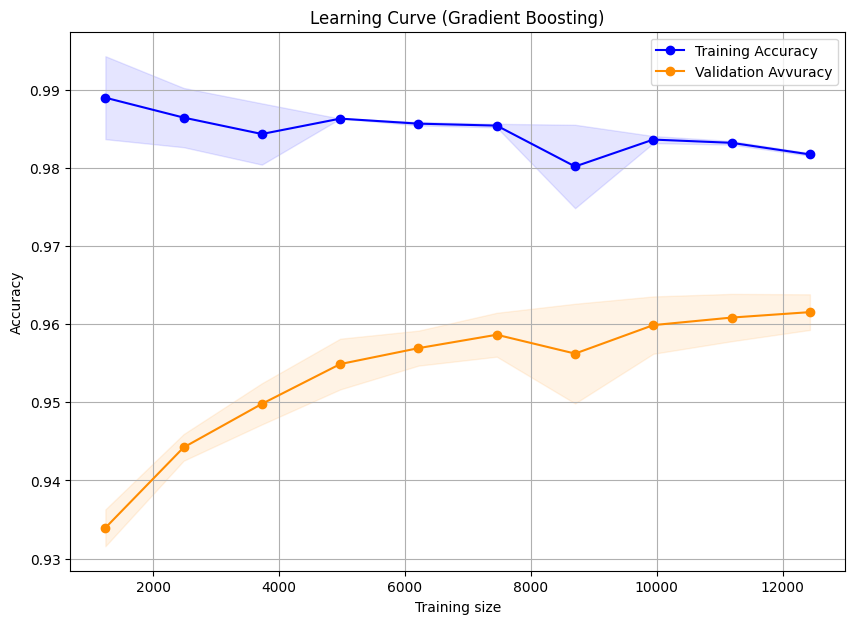

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 7))
    plt.title(title)
    plt.xlabel("Training size")
    plt.ylabel("Accuracy")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="darkorange")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="darkorange", label="Validation Avvuracy")

    plt.legend(loc="best")
    return plt

# Define the model
model = GradientBoostingClassifier(**best_params)  # Use the best hyperparameters found

# Plot learning curve
title = "Learning Curve (Gradient Boosting)"
plot = plot_learning_curve(model, title, X, y, cv=3, n_jobs=-1)

# Show plot
plot.show()

# Effects of the regularizers

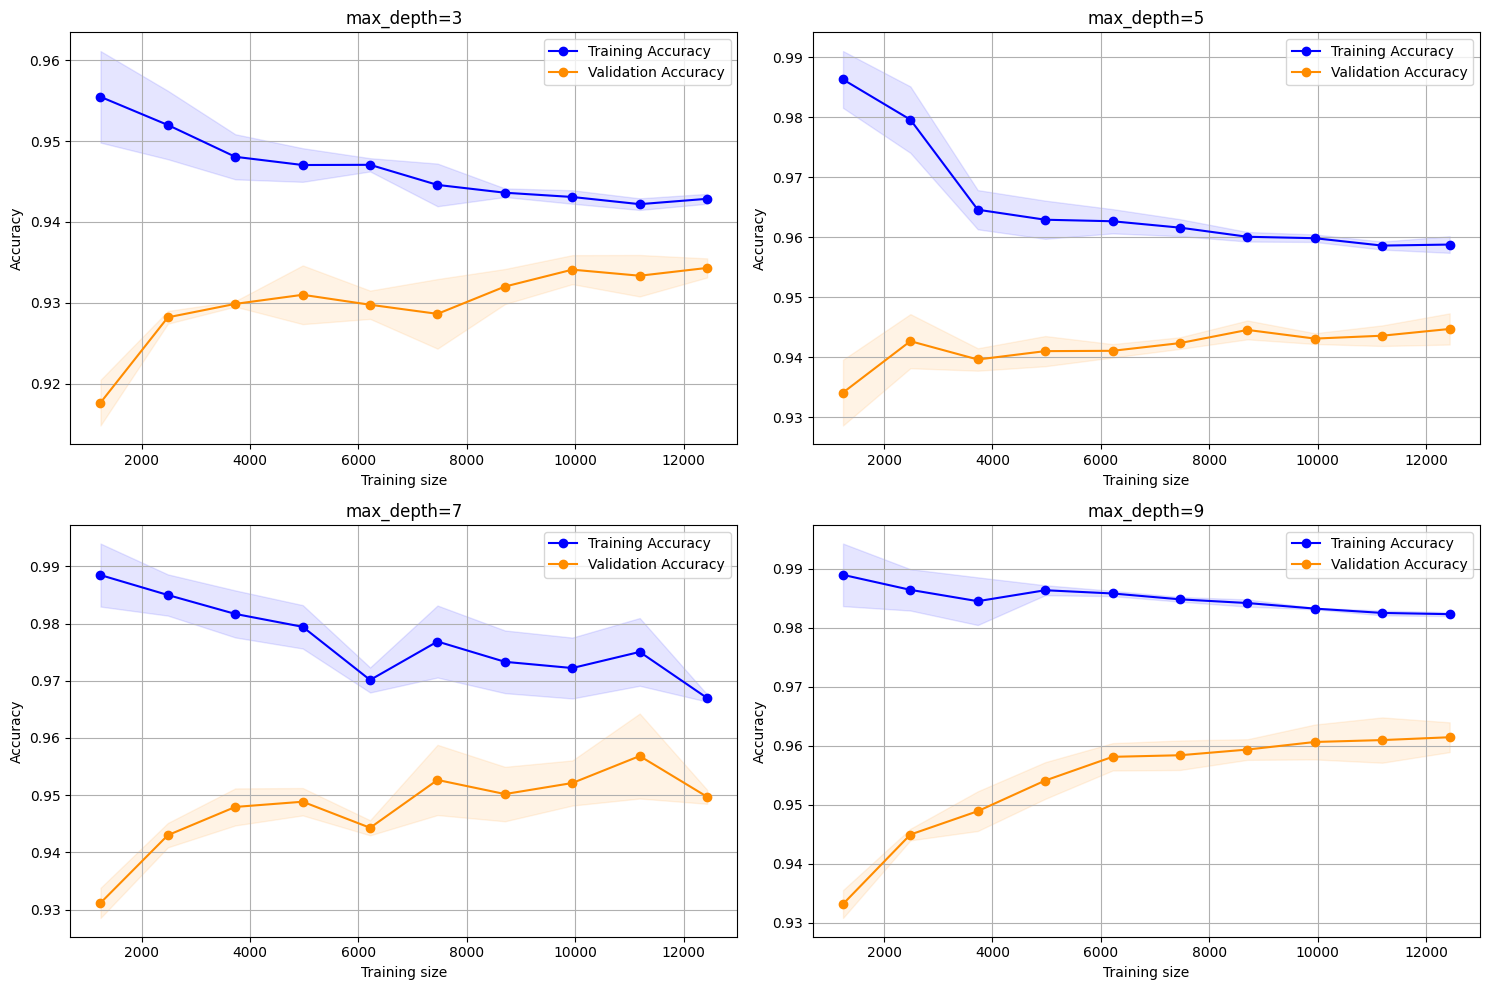

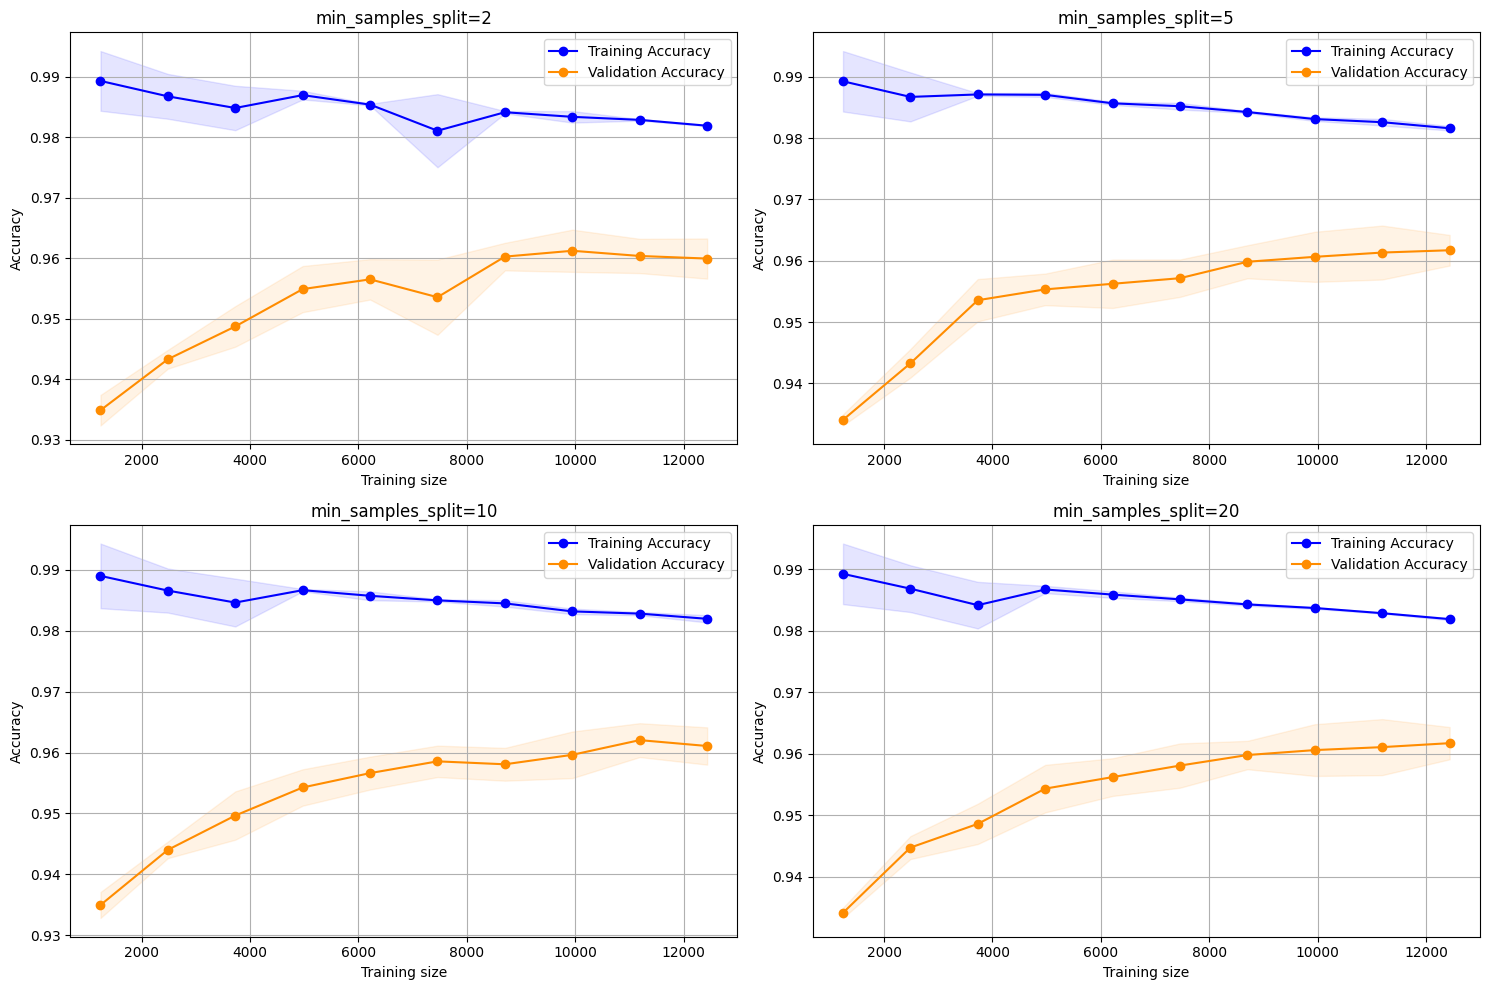

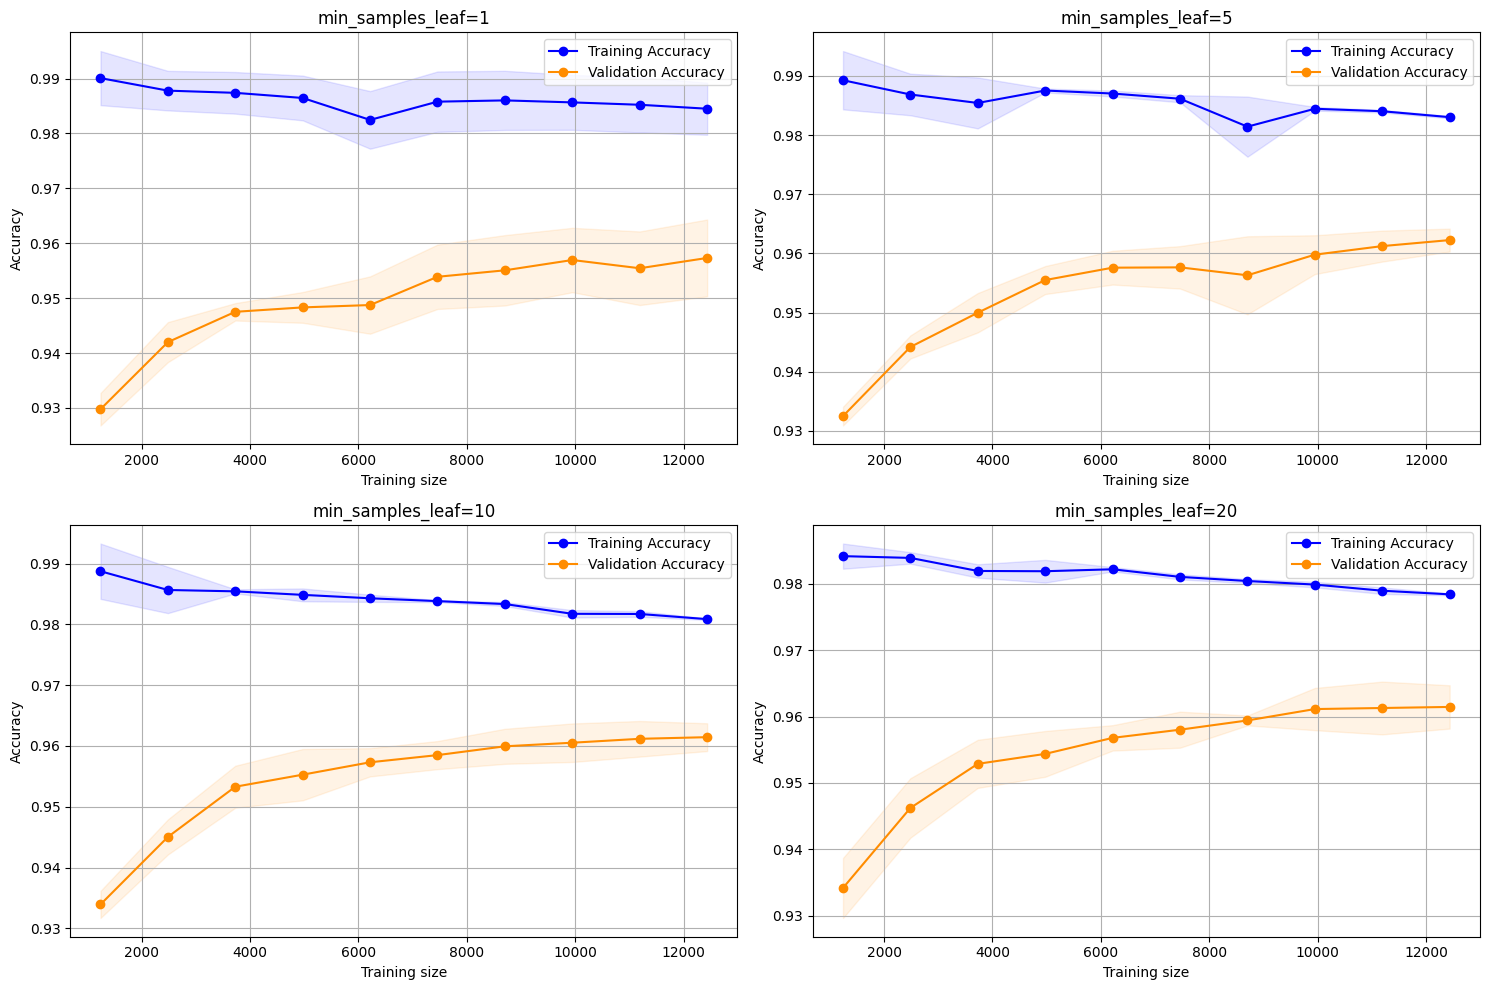

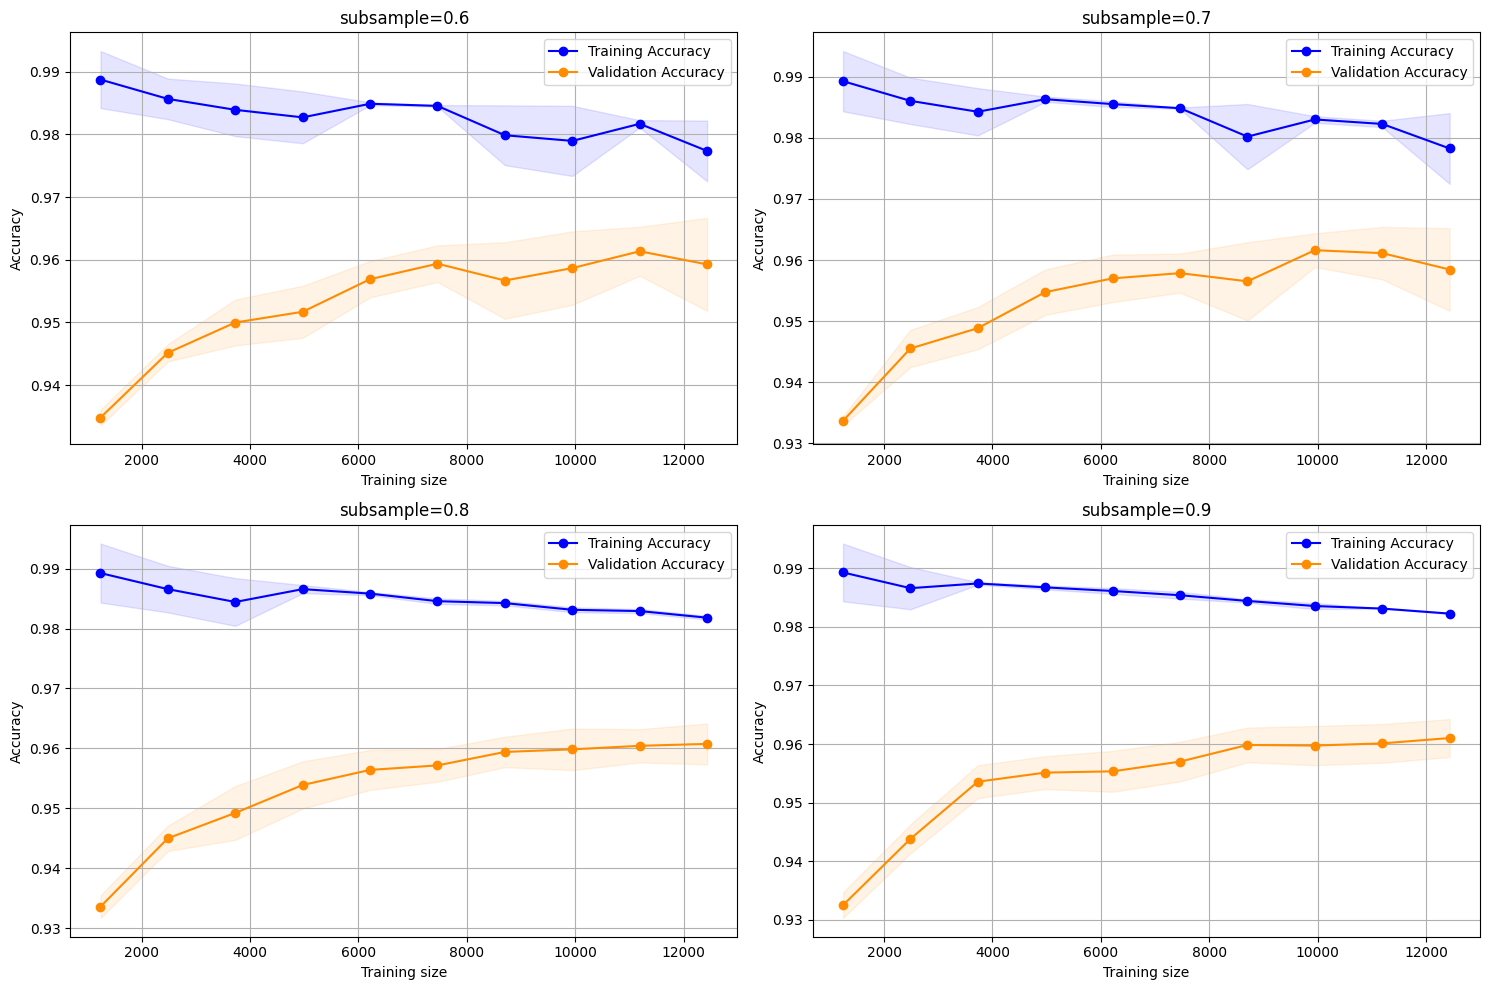

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curves for different hyperparameters
def plot_regularization_effects(X, y, param_name, param_range, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(15, 10))

    for i, param_value in enumerate(param_range):
        # Initialize the model with the current parameter value
        params = best_params.copy()
        params[param_name] = param_value
        model = GradientBoostingClassifier(**params)

        # Calculate the learning curve
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.subplot(2, 2, i + 1)
        plt.title(f"{param_name}={param_value}")
        plt.xlabel("Training size")
        plt.ylabel("Accuracy")
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="darkorange")

        plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Accuracy")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="darkorange", label="Validation Accuracy")

        plt.legend(loc="best")

    plt.tight_layout()
    plt.show()

# Define the parameter ranges for regularization
param_ranges = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'subsample': [0.6, 0.7, 0.8, 0.9]
}

# Plot the learning curves for each regularization parameter
for param_name, param_range in param_ranges.items():
    plot_regularization_effects(X, y, param_name, param_range)

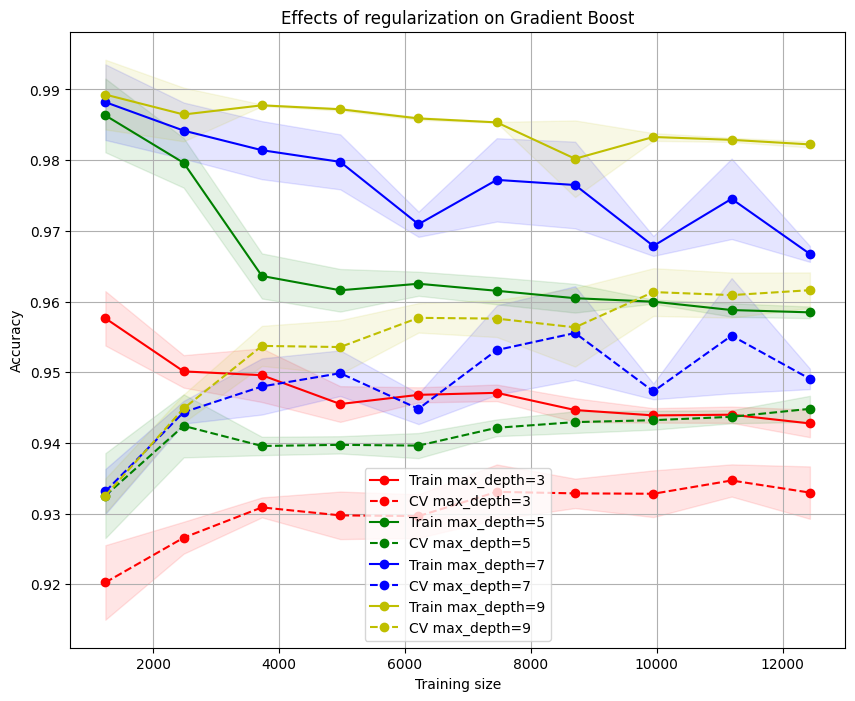

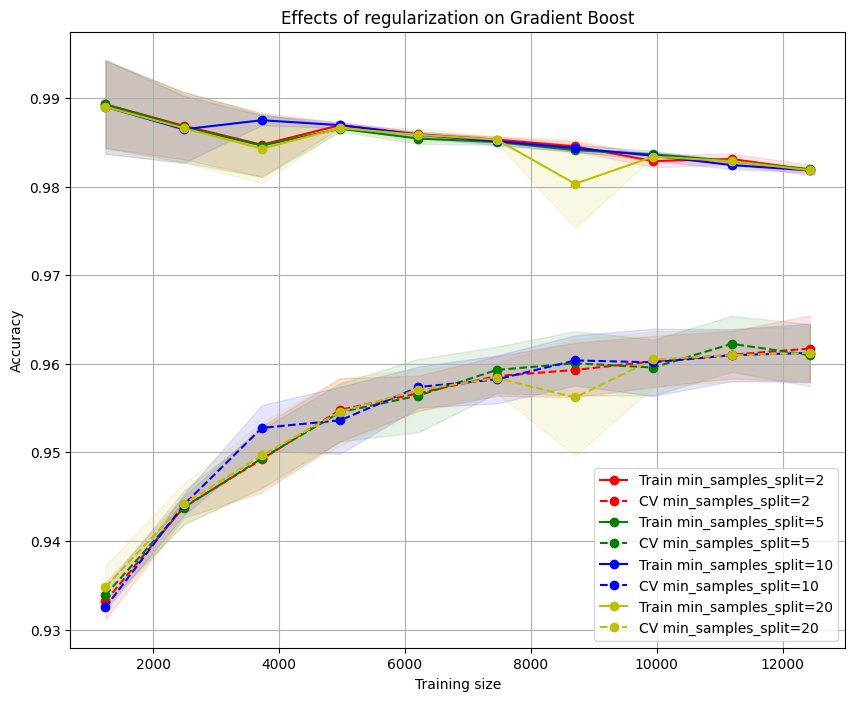

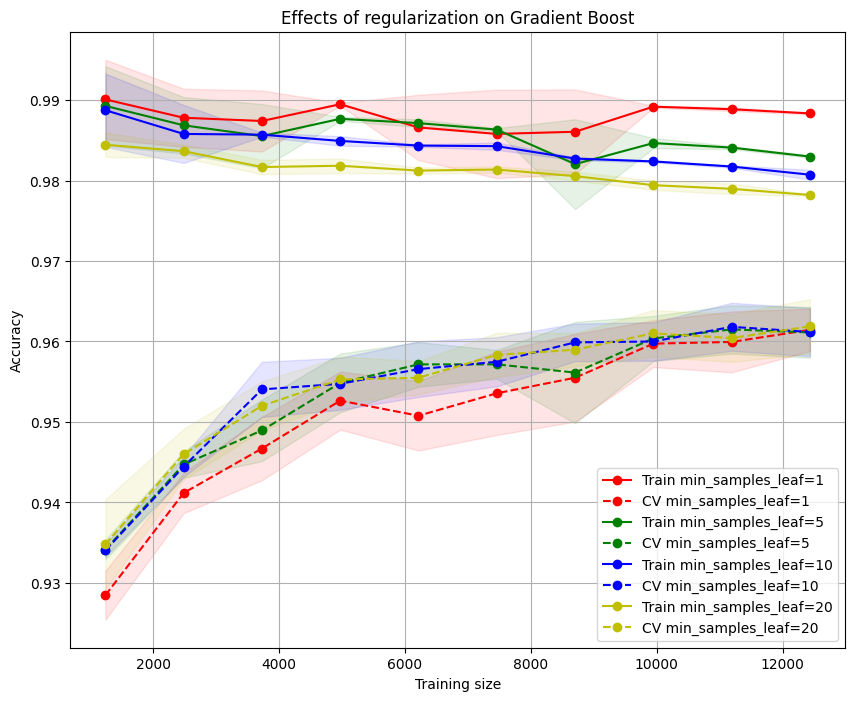

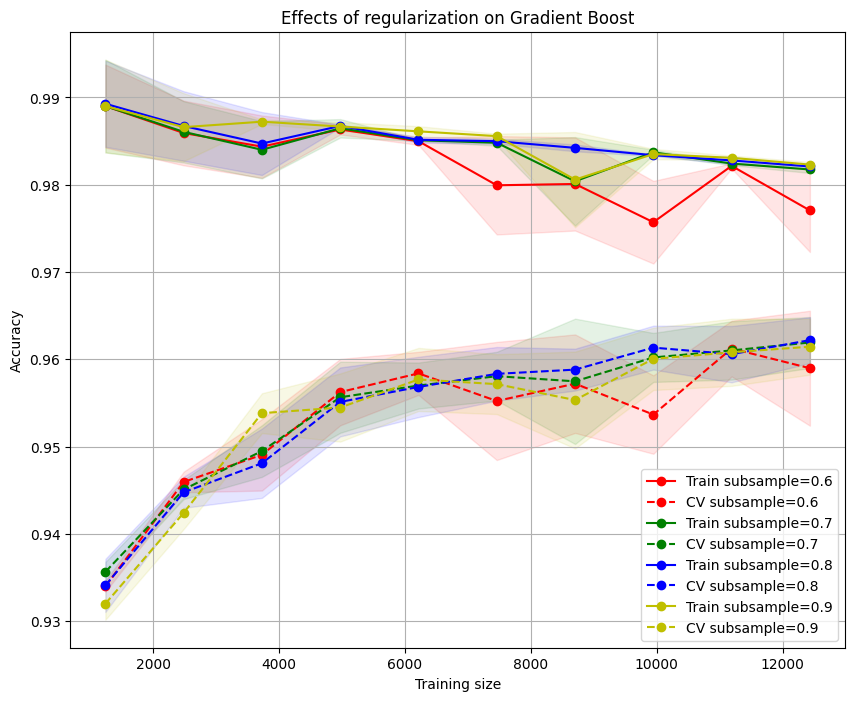

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curves for different hyperparameters on one graph
def plot_regularization_effects_on_one_graph(X, y, param_name, param_range, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 8))
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

    for i, param_value in enumerate(param_range):
        # Initialize the model with the current parameter value
        params = best_params.copy()
        params[param_name] = param_value
        model = GradientBoostingClassifier(**params)

        # Calculate the learning curve
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        color = colors[i % len(colors)]

        # Plot training scores
        plt.plot(train_sizes, train_scores_mean, 'o-', color=color, label=f"Train {param_name}={param_value}")
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color=color)

        # Plot cross-validation scores
        plt.plot(train_sizes, test_scores_mean, 'o--', color=color, label=f"CV {param_name}={param_value}")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color=color)

    plt.title(f"Effects of regularization on Gradient Boost")
    plt.xlabel("Training size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Define the parameter ranges for regularization
param_ranges = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
    'subsample': [0.6, 0.7, 0.8, 0.9]
}

# Plot the learning curves for each regularization parameter on one graph
for param_name, param_range in param_ranges.items():
    plot_regularization_effects_on_one_graph(X, y, param_name, param_range)

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Safe Email', 'Phishing Email'])
print(report)

                precision    recall  f1-score   support

    Safe Email       0.95      0.81      0.87      1457
Phishing Email       0.89      0.97      0.93      2273

      accuracy                           0.91      3730
     macro avg       0.92      0.89      0.90      3730
  weighted avg       0.91      0.91      0.91      3730



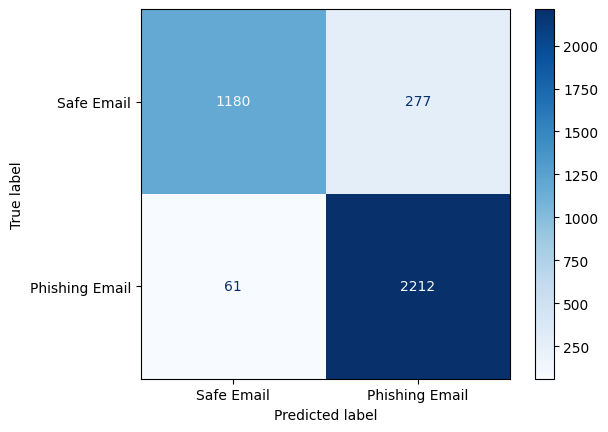

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe Email', 'Phishing Email'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

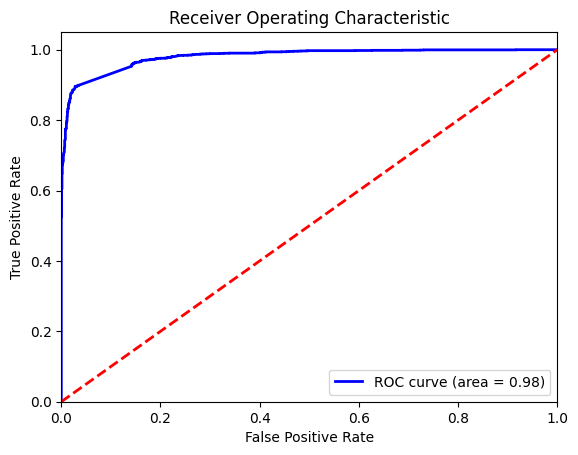

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Ensure the model and data variables are defined and loaded in previous cells

# Predict the probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
import psutil

# Get CPU usage
cpu_usage = psutil.cpu_percent()
print(f'CPU Usage: {cpu_usage}%')

# Get memory usage
memory_info = psutil.virtual_memory()
print(f'Total Memory: {memory_info.total} bytes')
print(f'Used Memory: {memory_info.used} bytes')
print(f'Free Memory: {memory_info.available} bytes')

# Get GPU information (if available)
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

CPU Usage: 29.3%
Total Memory: 13609435136 bytes
Used Memory: 2814947328 bytes
Free Memory: 10458099712 bytes


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4344322056718921407
 xla_global_id: -1]